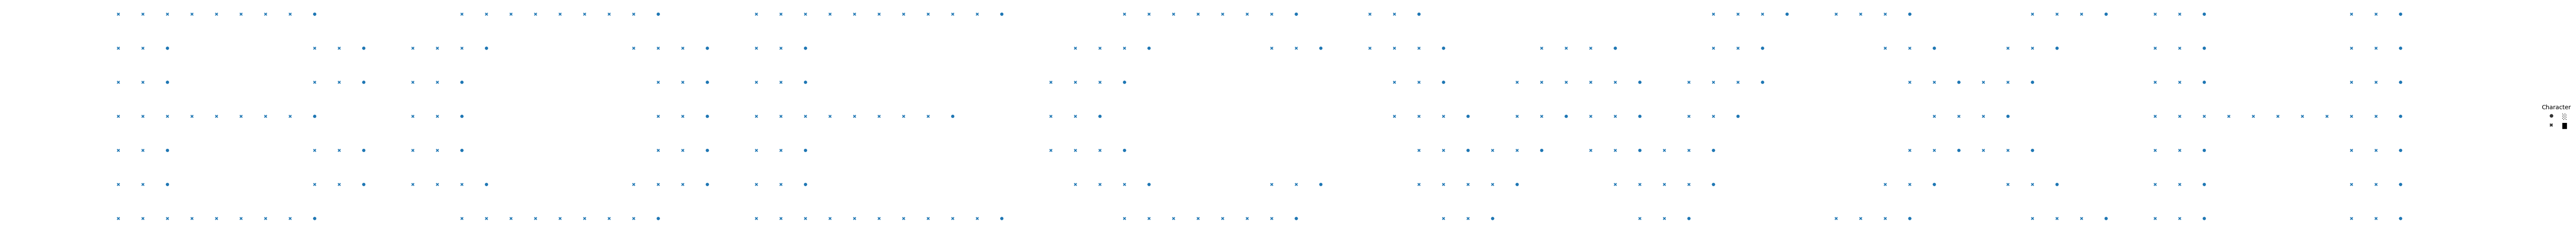

In [2]:
import requests
from bs4 import BeautifulSoup as Soup #Important library to pull data out of HTML
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://docs.google.com/document/d/e/2PACX-1vQGUck9HIFCyezsrBSnmENk5ieJuYwpt7YHYEzeNJkIb9OSDdx-ov2nRNReKQyey-cwJOoEKUhLmN9z/pub'

#Extracts data from inside the rows as strings. 'tr' are the rows and 'td' is the data inside
def parse_row(row):
    return [str(x.string) for x in row.find_all('td')]

def message_decoder(url):
    response = requests.get(url) #response is the response code of the GET request
    soup = Soup(response.text, 'html.parser') #soup is an object based on the entire website code parsed
    tables = soup.find_all('table')  #Soup function to find all the tables (there's only one in this page)

    msg_table = tables[0]
    rows = msg_table.find_all('tr')
    parsed_rows_list = [parse_row(row) for row in rows[1:]]
    df = DataFrame(parsed_rows_list)
    df.columns = [str(x.string) for x in rows[0].find_all('td')]
    num_columns = ['x-coordinate', 'y-coordinate']
    df[num_columns] = df[num_columns].apply(pd.to_numeric)
    msg = sns.relplot(data=df, x='x-coordinate', y='y-coordinate', kind='scatter', style='Character', height=6, aspect=10)
    msg.set(xticks=[], yticks=[], xlabel=None, ylabel=None)
    msg.despine(left=True, bottom=True)
    return msg

message_decoder(url)